Meilleurs hyperparamètres : {'gb__learning_rate': 0.05, 'gb__max_depth': 3, 'gb__n_estimators': 200}

Précision sur le test : 0.7489

Rapport de classification :
               precision    recall  f1-score   support

           0       0.78      0.85      0.82       150
           1       0.67      0.56      0.61        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231



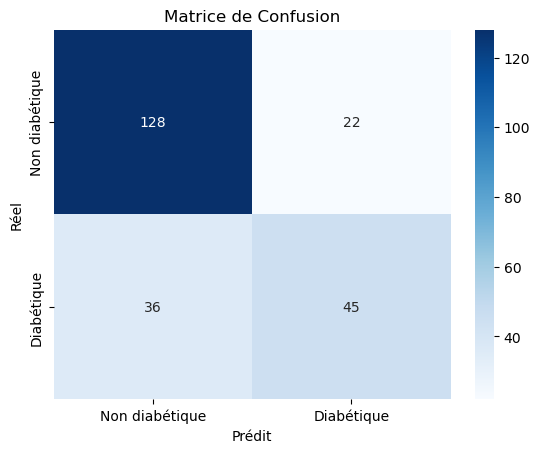

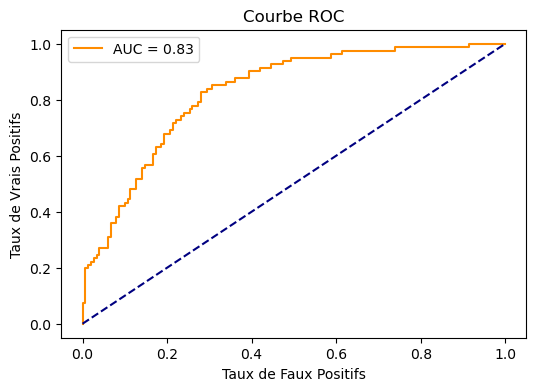


AUC : 0.8279

Précision moyenne en validation croisée : 0.7691 ± 0.0154

RÉSUMÉ FINAL :
- Précision test : 0.7489
- AUC test : 0.8279
- Validation croisée (acc) : 0.7691 ± 0.0154
- Meilleurs hyperparamètres : {'gb__learning_rate': 0.05, 'gb__max_depth': 3, 'gb__n_estimators': 200}


In [5]:
# Importation des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# 1. Chargement des données
data = pd.read_csv("diabetes.csv")

# 2. Remplacement des zéros par NaN dans les colonnes concernées
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_with_zeros] = data[cols_with_zeros].replace(0, np.nan)

# 3. Séparation X / y
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# 4. Séparation train / test avec stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 5. Prétraitement
numeric_features = X.columns
numeric_transformer = Pipeline(steps=[ 
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[ 
        ('num', numeric_transformer, numeric_features)
    ])

# 6. Pipeline complet avec GradientBoostingClassifier
pipe_gb = Pipeline([ 
    ('preprocessing', preprocessor),
    ('gb', GradientBoostingClassifier(random_state=42))
])

# 7. GridSearchCV pour tuning des hyperparamètres
param_grid = { 
    'gb__n_estimators': [100, 200, 300],
    'gb__learning_rate': [0.01, 0.05, 0.1],
    'gb__max_depth': [3, 5, 10],
}

grid_search = GridSearchCV(pipe_gb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 8. Meilleurs paramètres
best_model = grid_search.best_estimator_
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# 9. Prédictions
y_pred = best_model.predict(X_test)

# 10. Évaluation du modèle
acc = accuracy_score(y_test, y_pred)
print(f"\nPrécision sur le test : {acc:.4f}")

print("\nRapport de classification :\n", classification_report(y_test, y_pred))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non diabétique', 'Diabétique'], yticklabels=['Non diabétique', 'Diabétique'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.show()

# Courbe ROC
probs = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend()
plt.show()

print(f"\nAUC : {roc_auc:.4f}")

# 11. Validation croisée sur l'ensemble d'entraînement
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"\nPrécision moyenne en validation croisée : {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# 12. Résumé final automatique
print("\n\033[1mRÉSUMÉ FINAL :\033[0m")
print(f"- Précision test : {acc:.4f}")
print(f"- AUC test : {roc_auc:.4f}")
print(f"- Validation croisée (acc) : {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
print(f"- Meilleurs hyperparamètres : {grid_search.best_params_}")


1. Chargement et prétraitement des données :
Chargement du dataset diabetes.csv.




Remplacement des valeurs 0 par NaN dans certaines colonnes contenant des valeurs susceptibles de contenir des erreurs (Glucose, BloodPressure, SkinThickness, Insulin, BMI).

Séparation des données en variables explicatives (X) et variable cible (y).




2. Séparation des données en ensembles d'entraînement et de test :
Utilisation de train_test_split avec stratification pour que les classes soient équilibrées dans les deux ensembles.





3. Prétraitement des données :
Imputation des valeurs manquantes par la médiane (SimpleImputer).

Normalisation des données (moyenne 0, écart-type 1) à l'aide de StandardScaler.





4. Création du modèle :
Construction d'un pipeline avec deux étapes :

Prétraitement des données (imputation et normalisation).

Application du modèle Gradient Boosting (GradientBoostingClassifier).





5. Recherche d'hyperparamètres :
Utilisation de GridSearchCV pour tester différents hyperparamètres (nombre d'estimators, taux d'apprentissage, profondeur maximale des arbres) et trouver la meilleure combinaison.




6. Évaluation du modèle :
Prédictions sur l'ensemble de test.

Calcul de la précision (accuracy).

Affichage du rapport de classification (precision, recall, f1-score).

Calcul et affichage de la matrice de confusion et de la courbe ROC avec l'AUC.

Validation croisée sur l'ensemble d'entraînement pour obtenir une estimation de la performance du modèle.





7. Résumé final :
Affichage d'un résumé avec les résultats de la précision sur le test, AUC et validation croisée.





En résumé, ce code construit un modèle de classification Gradient Boosting, l'évalue avec des métriques classiques (accuracy, classification report), ainsi qu'une courbe ROC pour évaluer la performance globale du modèle. L'optimisation des hyperparamètres via GridSearchCV et la validation croisée permet de s'assurer de la robustesse du modèle.

Analyse des Résultats




AUC (0.8279) :

L'AUC (Area Under the Curve) est un bon indicateur de la performance du modèle dans la distinction entre les classes (diabétiques vs non diabétiques). Une AUC de 0.8279 est assez élevée, ce qui indique que le modèle a une capacité relativement bonne à séparer les classes, mais il y a encore de la place pour l'amélioration.





Précision sur le test (0.7489) :

La précision sur l'ensemble de test est de 74.89%. Cela signifie qu'environ 3/4 des prédictions faites par le modèle sont correctes. Cependant, il y a un écart entre la précision en validation croisée (76.91%) et la précision sur le test. Cela pourrait suggérer un léger surajustement, mais cela reste relativement faible.




Rapport de classification :




Classe 0 (Non diabétique) :

Précision (0.78) et rappel (0.85) sont bons, ce qui indique que le modèle détecte bien les non-diabétiques et ne fait pas trop d'erreurs sur cette classe.




Classe 1 (Diabétique) :

Précision (0.67) et rappel (0.56) sont plus faibles. Le modèle a des difficultés à détecter les diabétiques (rappel plus faible), ce qui suggère qu'il pourrait y avoir un déséquilibre entre les classes ou que le modèle n'est pas assez sensible aux exemples positifs.





Matrice de confusion :

La matrice de confusion montre que le modèle prédit 128 instances correctement pour la classe 0 (Non diabétique), mais fait 22 erreurs (faux positifs).




Pour la classe 1 (Diabétiques), le modèle détecte 36 instances correctement mais fait 45 erreurs (faux négatifs). Cela confirme un faible rappel pour la classe 1 (diabétique), suggérant que le modèle sous-estime les diabétiques.






Améliorations Possibles





Gestion du Déséquilibre de Classes :




Le modèle semble avoir un déséquilibre dans la classification des deux classes. La classe 1 (diabétique) a un rappel assez faible, ce qui signifie que le modèle manque beaucoup de cas de diabétiques. Vous pouvez essayer des techniques pour gérer cet aspect :

Rééchantillonnage (Over-sampling/Under-sampling) : Augmenter le nombre d'exemples de la classe minoritaire (diabétique) ou réduire la classe 
majoritaire (non diabétique)



Utilisation de poids d'échantillons : Ajouter des poids pour pénaliser davantage les erreurs sur les diabétiques.




Modèles spécialisés : Essayer des modèles comme le BalancedRandomForestClassifier ou des techniques d'Ensemble Learning comme XGBoost qui gèrent mieux le déséquilibre.




Tuning des Hyperparamètres :

Bien que les meilleurs hyperparamètres aient été trouvés (learning_rate, max_depth, n_estimators), il peut être intéressant d'explorer d'autres hyperparamètres pour améliorer la performance :



Subsample : Essayer des sous-échantillons plus petits pour augmenter la diversité du modèle.

Min_samples_split / min_samples_leaf : Ajuster ces paramètres pourrait améliorer la régularisation du modèle.

Max_features : Tester différentes valeurs pour le nombre de caractéristiques à considérer à chaque division d'arbre.

Modèle Alternatif :


Si l'AUC et la précision sont encore insuffisantes pour vos critères de performance, il pourrait être utile d'explorer d'autres modèles comme les SVM (Support Vector Machine), XGBoost ou CatBoost, qui ont montré de bonnes performances sur des problèmes similaires.

Conclusion





Le modèle actuel de Gradient Boosting offre de bons résultats, mais présente des difficultés à détecter correctement les cas de diabétiques (classe 1). L'AUC de 0.8279 et la précision de 74.89% montrent que le modèle fonctionne de manière satisfaisante, mais des améliorations peuvent être apportées, notamment en traitant le déséquilibre des classes et en ajustant certains hyperparamètres.

Il serait intéressant de tester des techniques de rééchantillonnage, de poids d'échantillons et de différents hyperparamètres pour améliorer le rappel pour la classe 1. Ces ajustements permettront au modèle de mieux prédire les diabétiques et d'améliorer ainsi la performance globale.